<a href="https://colab.research.google.com/github/alshubati99/Data-Science-Study/blob/main/Performance_Matrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performance Matrics
- Classification behavior of given classifier can be summarized in terms of the confusion matrix
- **Confusion Matrix:** <br>
  1. Actual Values (Positive, Negative) => Totals => (Positives: P= (TP + FN))(Negetives: N= (FP + TN))
  2. Predicted Values (Positive, Negative) => Totals => (Positives: TP + FP)(Negatives: FN + TN)
  3. **TP** = True Positives: Number of *positive* samples that are correctly classified as positive
  4. **FP** = False Positives: Number of *Negative* samples that are misclassified as positive
  5. **TN** = True Negatives: Number of *Negative* samples that are correctly classified as negative.
  6. **FN** = False Negatives: Number of *Positive* samples that are misclassified as negative
  7. **S**= Total number of samples = (TP + FP + TN + FN)

- **Accuracy:** <br>
  1. Percentage of correctly classified samples defined as Accuracy.
  2. Accuracy = (TP + TN)/(S)

- **Precision:** <br>
  1. Precision computes the proportion of positive predictions that correspond to correct classifications
  2. Precision = TP/(TP + FP)

- **Recall:** <br>
  1. Recall computes the proportion of positives that are correctly classified.
  2. Recall = TP/(TP + FN)

`Precision and Recall are generally used when the performance on the positive class is primary concern`

- **F1:** <br>
  1. F1 combines Precision and Recall into one metric
  2. F1 = (2xPrecisionxRecall)/(Precision + Recall)

- **True Positive Rate:** <br>
  1. TPR = Recall or Sensitivity
  2. TPR = TP/P = TP/(TP + FN)

- **False Positive Rate:** <br>
  1. FPR = FP/N = FP/(TN + FP)

- **True Negative Rate:** <br>
  1. TNR = Specificity
  2. TNR = TN/N = TN/(TN + FP)

- **Geometric Mean:** <br>
  1. GMean = sqrt((TP/P)*(TN/N))

- **Area Under Curve:** <br>
  1. The AUC score is the area under the curve plotted using TPR and FPR. It is based on ranking the tested samples according to the scores computed by the classifier.



In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score, confusion_matrix

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data['data'] # feature matrix
y = data['target'] #1 represents positive case

X.shape

(569, 30)

In [8]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [9]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(y_test)
print(y_pred)

[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1]
[1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print(accuracy_score(y_test,y_pred))
print('Accuracy = {:.6f}'.format(clf.score(x_test, y_test)))

0.9473684210526315
Accuracy = 0.947368


In [11]:
print("Number of Positive Samples")
print(np.count_nonzero(y_test==1))
print("Number of Negative Samples")
print(np.count_nonzero(y_test==0))

cm = confusion_matrix(y_test,y_pred)
print("TN: ", cm[0][0])
print("FP: ", cm[0][1])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])

Number of Positive Samples
72
Number of Negative Samples
42
TN:  38
FP:  4
FN:  2
TP:  70


In [12]:
print(precision_score(y_test,y_pred)) # TP/(FP+TP)
print(cm[1][1]/(cm[0][1]+cm[1][1]))

0.9459459459459459
0.9459459459459459


In [13]:
print(recall_score(y_test,y_pred)) #TP/(TP+FN)
print(cm[1][1]/(cm[1][1]+cm[1][0]))

0.9722222222222222
0.9722222222222222


In [14]:
print(f1_score(y_test,y_pred))

0.9589041095890412


In [16]:
# for ROC the score is needed rather than labels
y_pred = clf.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,y_pred))

0.9877645502645502


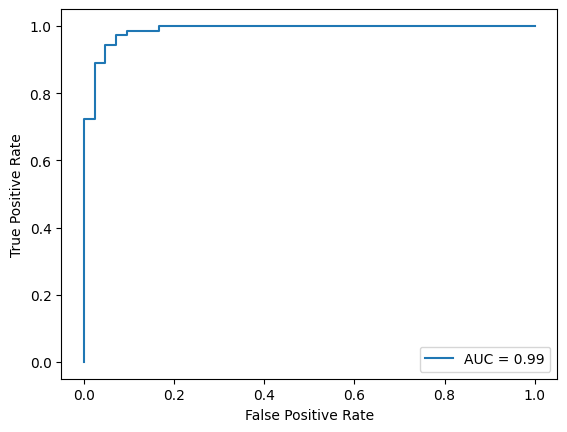

In [22]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr, tpr, threshholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()
plt.show()